In [23]:
import nltk
import os

# Define the desired download directory
download_directory = r"C:/Users/jalal/Documents/py_envs/basepy31306/nltk_data/" 

# Create the directory if it doesn't exist
os.makedirs(download_directory, exist_ok=True)

# Add your custom directory to the NLTK data path
nltk.data.path=[]
nltk.data.path.append(download_directory)
for i in nltk.data.path:
    print(i)

# Download the desired NLTK data (e.g., 'punkt' tokenizer)
# You can replace 'punkt' with 'all' to download everything, or specific packages like 'wordnet', 'stopwords', etc.
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
print("Setup complete.")

C:/Users/jalal/Documents/py_envs/basepy31306/nltk_data/
Setup complete.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:
# Terminal: pip install pandas nltk scikit-learn gensim streamlit matplotlib altair numpy rapidfuzz

import nltk
print('nltk imported')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
print("Setup complete.")

nltk imported
Setup complete.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jalal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [2]:
# Load DataFrame
df = pd.read_csv('data/data.csv')  # Replace with your file path
comments_col = 'comments'  # Your column name

In [9]:
df.head()

,id,date,rating,comments
0,1,2024-06-05,5,"Great quality materials. No complaints here, w..."
1,2,2024-09-14,5,Amazing build quality! It feels premium and wo...
2,3,2024-07-20,3,NaN
3,4,2024-08-09,5,Outstanding value. Five stars all the way. (Te...
4,5,2024-10-19,2,Took forever to get a response from support. F...


In [5]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:

def preprocess_text(text):
    if pd.isna(text):
        return '', []
    text_str = re.sub(r'[^\w\s]', '', str(text).lower())
    tokens = word_tokenize(text_str)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens 
                         if token not in stop_words and len(token) > 2]
    processed_str = ' '.join(lemmatized_tokens)
    return processed_str, lemmatized_tokens



In [25]:
# Apply preprocessing
df[['processed_comments', 'tokens']] = df[comments_col].apply(
    lambda x: pd.Series(preprocess_text(x)))
print(f"Preprocessed sample: {df['processed_comments'].iloc[0]}")
print(f"Tokens sample: {df['tokens'].iloc[0][:5]}")  # First 5 tokens

Preprocessed sample: great quality material complaint worth every penny test
Tokens sample: ['great', 'quality', 'material', 'complaint', 'worth']


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from collections import Counter

# Extract bigrams
def extract_bigrams(text):
    tokens = word_tokenize(text)
    return list(ngrams(tokens, 2))

df['bigrams'] = df['processed_comments'].apply(extract_bigrams)
all_bigrams = [bigram for bigrams_list in df['bigrams'] for bigram in bigrams_list]
bigram_freq = Counter(all_bigrams)
print("Top 5 frequent bigrams:", bigram_freq.most_common(5))

# TF-IDF for unigrams
vectorizer_uni = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1,1))
tfidf_uni = vectorizer_uni.fit_transform(df['processed_comments'].fillna(''))
feature_names_uni = vectorizer_uni.get_feature_names_out()

# For bigrams
vectorizer_bi = TfidfVectorizer(max_features=500, stop_words='english', ngram_range=(2,2))
tfidf_bi = vectorizer_bi.fit_transform(df['processed_comments'].fillna(''))
feature_names_bi = vectorizer_bi.get_feature_names_out()

# Get top terms
def get_top_terms(tfidf_matrix, feature_names, top_n=50, threshold=0.1):
    scores = tfidf_matrix.mean(axis=0).A1
    top_indices = scores.argsort()[-top_n:][::-1]
    top_terms = [(feature_names[i], scores[i]) for i in top_indices if scores[i] > threshold]
    return top_terms

top_unigrams = get_top_terms(tfidf_uni, feature_names_uni)
top_bigrams = get_top_terms(tfidf_bi, feature_names_bi)
key_terms = [term[0] for term in top_unigrams + top_bigrams]
print("Sample key terms/phrases:", key_terms[:10])

Top 5 frequent bigrams: [(('test', 'plus'), 16), (('plus', 'color'), 16), (('color', 'option'), 16), (('option', 'fantastic'), 16), (('billing', 'error'), 11)]
Sample key terms/phrases: ['test']



Computing for measure: c_v
  Num Topics: 2, Coherence: 0.2788, Perplexity: 61.65
  Num Topics: 3, Coherence: 0.3005, Perplexity: 49.09
  Num Topics: 4, Coherence: 0.2740, Perplexity: 47.96
  Num Topics: 5, Coherence: 0.2755, Perplexity: 41.51
  Num Topics: 6, Coherence: 0.3248, Perplexity: 38.69
  Num Topics: 7, Coherence: 0.3066, Perplexity: 36.14
  Num Topics: 8, Coherence: 0.3263, Perplexity: 33.95
  Num Topics: 9, Coherence: 0.2939, Perplexity: 31.25
  Num Topics: 10, Coherence: 0.3227, Perplexity: 31.53
  Num Topics: 11, Coherence: 0.3499, Perplexity: 32.04
  Num Topics: 12, Coherence: 0.3477, Perplexity: 33.87
  Num Topics: 13, Coherence: 0.3131, Perplexity: 30.41
  Num Topics: 14, Coherence: 0.3344, Perplexity: 30.17
  Num Topics: 15, Coherence: 0.3410, Perplexity: 32.96

Computing for measure: u_mass
  Num Topics: 2, Coherence: -14.0068, Perplexity: 61.65
  Num Topics: 3, Coherence: -16.8968, Perplexity: 49.09
  Num Topics: 4, Coherence: -15.8016, Perplexity: 47.96
  Num Topic

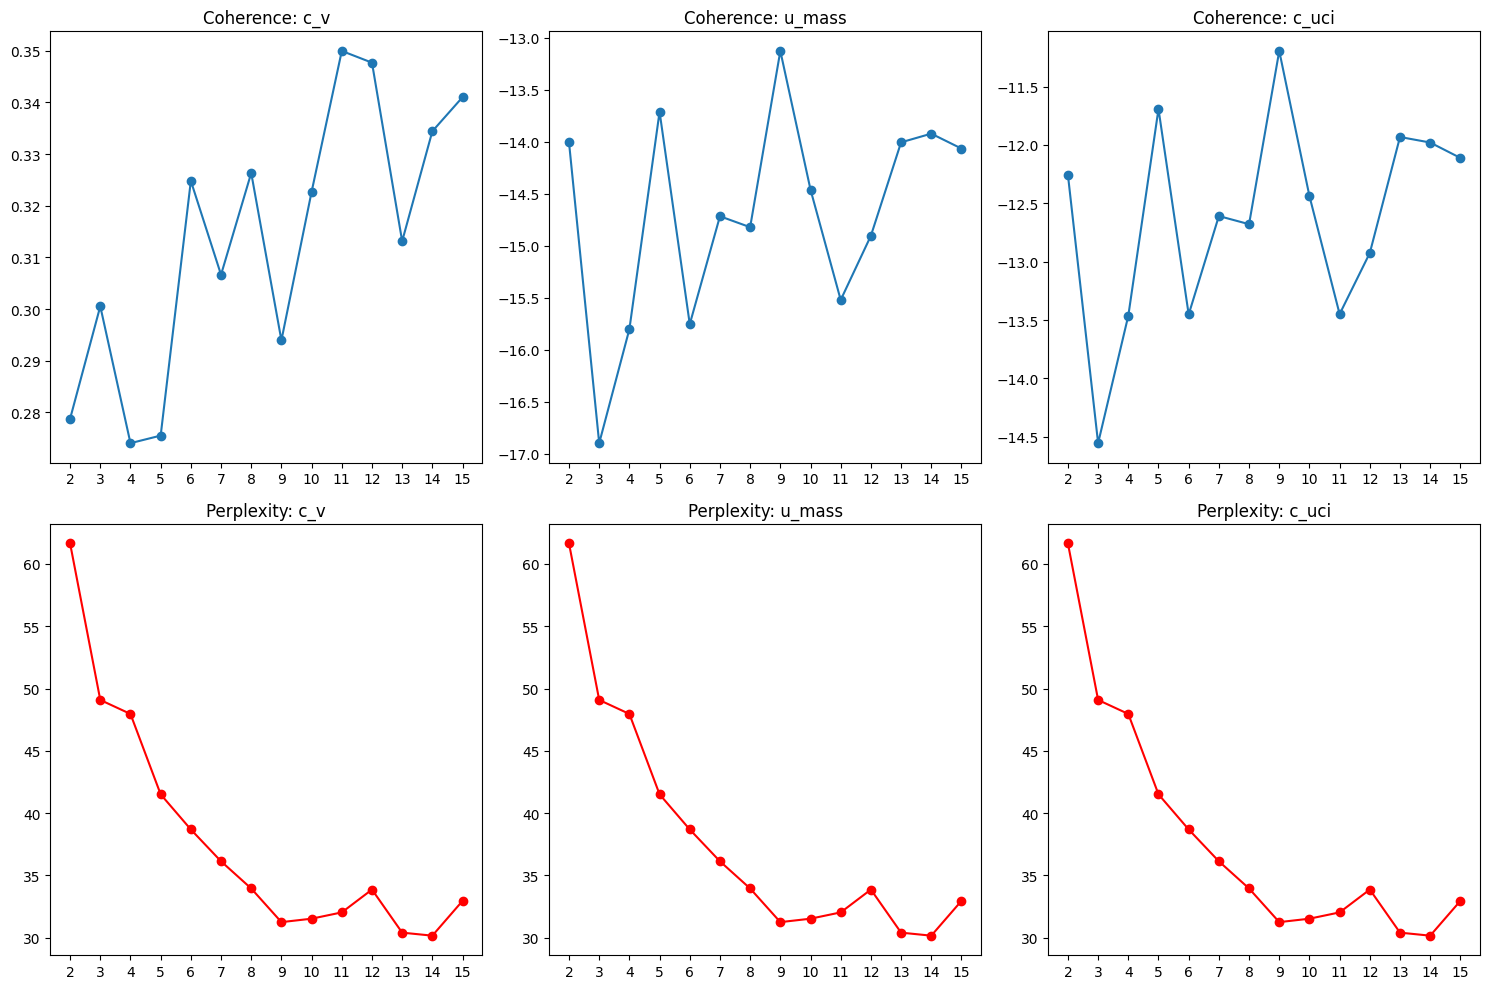


Optimal for c_v: 3 topics (coh: 11, elbow: 3)

Optimal for u_mass: 3 topics (coh: 9, elbow: 3)

Optimal for c_uci: 3 topics (coh: 9, elbow: 3)
Using c_v: 3 topics
Topic 0: poor, billing, quickly, error, overall, resolved, service, shipping, return, arrived
Topic 1: service, wont, customer, buy, rude, unhelpful, frustrating, experience, get, took
Topic 2: delivery, late, product, quality, service, improvement, fine, disappointing, week, need
Evaluation complete.


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

def safe_preprocess_tokens(df, col='processed_comments'):
    if 'tokens' not in df.columns:
        from nltk.tokenize import word_tokenize
        from nltk.corpus import stopwords
        from nltk.stem import WordNetLemmatizer
        stop_words = set(stopwords.words('english'))
        lemmatizer = WordNetLemmatizer()
        def tokenize_text(text):
            if pd.isna(text) or not text.strip():
                return []
            tokens = word_tokenize(str(text).lower())
            return [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 2]
        df['tokens'] = df[col].apply(tokenize_text)
    return df

def detect_elbow(perplexities, start=2):
    if len(perplexities) < 3:
        return start
    diffs = np.diff(perplexities)
    elbow_idx = np.argmax(np.abs(diffs))
    return start + elbow_idx + 1

try:
    if 'df' not in locals():
        raise ValueError("DataFrame 'df' not found. Load your data first.")
    df = safe_preprocess_tokens(df)
    
    texts = [tokens for tokens in df['tokens'] if tokens]
    if len(texts) == 0:
        raise ValueError("No valid texts after preprocessing.")
    if len(texts) < 50:
        print(f"Warning: Small corpus ({len(texts)} docs). Metrics may be unreliable.")
    
    dictionary = corpora.Dictionary(texts)
    if len(dictionary) < 10:
        raise ValueError("Dictionary too small.")
    dictionary.filter_extremes(no_below=2, no_above=0.5, keep_n=1000)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    def compute_metrics(start=2, end=15, step=1, measures=['c_v', 'u_mass', 'c_uci']):
        results = {measure: {'coherence_values': [], 'perplexities': [], 'model_list': []} for measure in measures}
        for measure in measures:
            print(f"\nComputing for measure: {measure}")
            for num_topics in range(start, end + 1, step):
                try:
                    model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, 
                                     random_state=42, passes=10, alpha='auto', eta='auto')
                    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=measure)
                    coherence_value = coherence_model.get_coherence()
                    log_ppl = model.log_perplexity(corpus)
                    perplexity = np.exp(-log_ppl)
                    results[measure]['coherence_values'].append(coherence_value)
                    results[measure]['perplexities'].append(perplexity)
                    results[measure]['model_list'].append(model)
                    print(f"  Num Topics: {num_topics}, Coherence: {coherence_value:.4f}, Perplexity: {perplexity:.2f}")
                except Exception as e:
                    print(f"  Error for {num_topics} topics ({measure}): {e}. Skipping.")
                    results[measure]['coherence_values'].append(np.nan)
                    results[measure]['perplexities'].append(np.nan)
                    results[measure]['model_list'].append(None)
        return results
    
    results = compute_metrics()
    
    # Plots
    x = np.arange(2, 16, 1)
    fig, axs = plt.subplots(2, len(results), figsize=(15, 10))
    if len(results) == 1:
        axs = axs.reshape(2, -1)
    for idx, (measure, data) in enumerate(results.items()):
        axs[0, idx].plot(x, data['coherence_values'], marker='o')
        axs[0, idx].set_title(f"Coherence: {measure}")
        axs[0, idx].set_xticks(x)
        axs[1, idx].plot(x, data['perplexities'], marker='o', color='red')
        axs[1, idx].set_title(f"Perplexity: {measure}")
        axs[1, idx].set_xticks(x)
    plt.tight_layout()
    plt.savefig('metrics_comparison.png')
    plt.show()
    
    # Optimal
    optimal_results = {}
    for measure, data in results.items():
        coh_valid = [s for s in data['coherence_values'] if not np.isnan(s)]
        ppl_valid = [s for s in data['perplexities'] if not np.isnan(s)]
        if not coh_valid or not ppl_valid:
            continue
        coh_best_idx = np.argmax(coh_valid)
        coh_optimal = 2 + coh_best_idx
        ppl_elbow = detect_elbow(np.array(ppl_valid))
        combined_optimal = min(coh_optimal, ppl_elbow)
        optimal_model = data['model_list'][combined_optimal - 2]
        optimal_results[measure] = {
            'num_topics': combined_optimal, 'coh_score': coh_valid[coh_best_idx], 
            'ppl': ppl_valid[combined_optimal - 2], 'elbow': ppl_elbow, 'model': optimal_model
        }
        print(f"\nOptimal for {measure}: {combined_optimal} topics (coh: {coh_optimal}, elbow: {ppl_elbow})")
    
    if not optimal_results:
        raise RuntimeError("All computations failed.")
    
    default_measure = 'c_v' if 'c_v' in optimal_results else list(optimal_results.keys())[0]
    optimal_model = optimal_results[default_measure]['model']
    optimal_num_topics = optimal_results[default_measure]['num_topics']
    print(f"Using {default_measure}: {optimal_num_topics} topics")
    
    # Update df
    doc_topics = optimal_model[corpus]
    df = df.iloc[:len(doc_topics)].copy()
    df['dominant_topic'] = [max(range(optimal_num_topics), key=lambda i: next((prob for j, prob in doc_topics[k] if j == i), 0)) 
                            for k, doc in enumerate(doc_topics)]
    df['topic_prob'] = [max([prob for _, prob in doc]) if doc else 0 for doc in doc_topics]
    
    top_words_per_topic = []
    for idx in range(optimal_num_topics):
        try:
            top_words = [word for word, _ in optimal_model.show_topic(idx, topn=10)]
        except:
            top_words = ['unknown'] * 10
        top_words_per_topic.append(top_words)
        print(f"Topic {idx}: {', '.join(top_words)}")
    
    topic_labels = [top_words[0].title() if top_words else 'Unknown' for top_words in top_words_per_topic]
    df['topic_label'] = [topic_labels[i] for i in df['dominant_topic']]
    
    print("Evaluation complete.")
    
except ImportError as e:
    print(f"Import error: {e}. Install packages.")
except (ValueError, RuntimeError) as e:
    print(f"Error: {e}. Fallback to scikit-learn LDA.")
    from sklearn.decomposition import LatentDirichletAllocation
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    X = vectorizer.fit_transform(df['processed_comments'].fillna(''))
    lda_fallback = LatentDirichletAllocation(n_components=5, random_state=42)
    lda_fallback.fit(X)
    df['dominant_topic'] = lda_fallback.transform(X).argmax(axis=1)
    df['topic_prob'] = 1.0  # Dummy
    topic_labels = ['Fallback'] * 5
    df['topic_label'] = 'Fallback'
    top_words_per_topic = [['unknown'] * 10] * 5
    optimal_num_topics = 5
    print("Fallback LDA used.")
except Exception as e:
    print(f"Unexpected error: {e}.")

In [28]:
from rapidfuzz import fuzz  # Optional; pip install rapidfuzz

def filter_by_term(df, term, column=comments_col, fuzzy_threshold=80):
    if fuzzy_threshold:
        return df[df[column].apply(lambda x: fuzz.partial_ratio(str(x), term) >= fuzzy_threshold if pd.notna(x) else False)]
    return df[df[column].str.contains(term, case=False, na=False)]

def filter_by_topic(df, topic_id=None, topic_label=None, threshold=0.5):
    if topic_id is not None:
        filtered = df[df['dominant_topic'] == topic_id]
    elif topic_label is not None:
        filtered = df[df['topic_label'] == topic_label]
    else:
        return df
    return filtered[filtered['topic_prob'] >= threshold]

def combined_filter(df, selected_terms=None, selected_topic=None, custom_term=None, threshold=0.5):
    filtered = df.copy()
    if selected_terms:
        for term in selected_terms:
            filtered = filter_by_term(filtered, term)
    if selected_topic is not None:
        filtered = filter_by_topic(filtered, topic_id=selected_topic, threshold=threshold)
    if custom_term:
        filtered = filter_by_term(filtered, custom_term)
    return filtered

# Test
print(f"Rows matching sample term: {len(combined_filter(df, selected_terms=[key_terms[0]]))}")

Rows matching sample term: 0
